###Problem Statement:

In the highly competitive landscape of digital marketing, effectively evaluating the success of
various marketing campaigns is essential for optimizing return on investment (ROI) and
improving overall performance. Despite having extensive data on multiple campaigns, there
is a need for a thorough analysis to assess and compare key metrics such as conversion
rates, acquisition costs, and ROI across different campaign types, channels, and audience
segments. This project aims to uncover actionable insights by examining temporal trends,
geographical influences, and audience responses to identify factors driving campaign
success and provide recommendations for enhancing future marketing strategies.

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##1) Load the Dataset

In [ ]:
marketing_campaign = pd.read_csv("https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/marketing_campaign.csv")
marketing_campaign

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,TechCorp,Email,Women 25-34,30 days,Facebook,5.294194,9344,62.94,Houston,English,3045,67836,5,Tech Enthusiasts,01-01-2023
1,2,Innovate Industries,Influencer,Women 35-44,45 days,Google Ads,3.326375,8783,10.67,"Washington, D.C.",German,1944,66361,4,Foodies,01-01-2023
2,3,NexGen Systems,Social Media,Women 25-34,45 days,Instagram,4.056375,9111,73.20,Miami,Spanish,3156,86240,8,Fashionistas,01-01-2023
3,4,Innovate Industries,Email,Women 25-34,45 days,Instagram,4.496375,7420,60.92,Seattle,Spanish,2388,58251,6,Foodies,01-01-2023
4,5,Data Tech Solutions,Influencer,Men 25-34,30 days,Google Ads,4.405930,2146,138.82,Chicago,English,1025,34407,5,Tech Enthusiasts,01-01-2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22024,22025,Data Tech Solutions,Search,Men 18-24,30 days,Website,4.379947,4748,-7.01,New York,Spanish,883,20848,8,Fashionistas,31-12-2023
22025,22026,Data Tech Solutions,Social Media,Men 18-24,45 days,Google Ads,5.889947,5567,-87.96,Houston,Mandarin,134,2332,8,Outdoor Adventurers,31-12-2023
22026,22027,TechCorp,Influencer,Women 25-34,30 days,Facebook,4.319947,7154,-9.21,Seattle,German,1299,31078,9,Outdoor Adventurers,31-12-2023
22027,22028,Data Tech Solutions,Search,Men 18-24,45 days,Facebook,3.959947,6471,95.18,Dallas,Mandarin,2526,66129,8,Health & Wellness,31-12-2023


##2) Descriptive Analysis

#Basic Structure:


In [ ]:
#Print the first few rows of the dataset to get an overview of the data
marketing_campaign.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,TechCorp,Email,Women 25-34,30 days,Facebook,5.294194,9344,62.94,Houston,English,3045,67836,5,Tech Enthusiasts,01-01-2023
1,2,Innovate Industries,Influencer,Women 35-44,45 days,Google Ads,3.326375,8783,10.67,"Washington, D.C.",German,1944,66361,4,Foodies,01-01-2023
2,3,NexGen Systems,Social Media,Women 25-34,45 days,Instagram,4.056375,9111,73.20,Miami,Spanish,3156,86240,8,Fashionistas,01-01-2023
3,4,Innovate Industries,Email,Women 25-34,45 days,Instagram,4.496375,7420,60.92,Seattle,Spanish,2388,58251,6,Foodies,01-01-2023
4,5,Data Tech Solutions,Influencer,Men 25-34,30 days,Google Ads,4.405930,2146,138.82,Chicago,English,1025,34407,5,Tech Enthusiasts,01-01-2023


In [ ]:
#Obtain the number of rows and columns in the dataset.
marketing_campaign.shape

(22029, 16)

In [ ]:
#Get a concise summary of the dataset, including the data types and non-null values.
#dataset information use of data analysis
marketing_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22029 entries, 0 to 22028
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Campaign_ID       22029 non-null  int64  
 1   Company           22029 non-null  object 
 2   Campaign_Type     22029 non-null  object 
 3   Target_Audience   22029 non-null  object 
 4   Duration          22029 non-null  object 
 5   Channel_Used      22029 non-null  object 
 6   Conversion_Rate   22029 non-null  float64
 7   Acquisition_Cost  22029 non-null  int64  
 8   ROI               22029 non-null  float64
 9   Location          22029 non-null  object 
 10  Language          22029 non-null  object 
 11  Clicks            22029 non-null  int64  
 12  Impressions       22029 non-null  int64  
 13  Engagement_Score  22029 non-null  int64  
 14  Customer_Segment  22029 non-null  object 
 15  Date              22029 non-null  object 
dtypes: float64(2), int64(5), object(9)
memor

In [ ]:
#Generate descriptive statistics for numerical columns.
marketing_campaign.describe()

,Campaign_ID,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score
count,22029.000000,22029.000000,22029.000000,22029.000000,22029.000000,22029.000000,22029.000000
mean,11015.000000,4.757232,5522.740842,182.863648,2223.807572,50610.402787,6.582323
std,6359.368876,0.960393,2597.666260,301.619721,1394.166380,28542.979123,1.458804
min,1.000000,2.015723,1000.000000,-98.300000,30.000000,1001.000000,4.000000
25%,5508.000000,4.130705,3286.000000,-4.080000,1067.000000,25804.000000,5.000000
50%,11015.000000,4.761527,5525.000000,93.650000,2088.000000,50858.000000,7.000000
75%,16522.000000,5.429335,7766.000000,247.310000,3212.000000,75165.000000,8.000000
max,22029.000000,7.469907,9999.000000,3109.790000,6887.000000,99999.000000,9.000000


####I use of discribe function in the dataset we get

- Total count is 22029

- mean is 11015 in 	Campaign_ID

- maximum of clicks 6887



##Data Exploration:

In [ ]:
#print the number of unique Campaign_ID values in the dataset.
marketing_campaign['Campaign_ID'].unique()


array([    1,     2,     3, ..., 22027, 22028, 22029])

In [ ]:
#List the unique values of the Location and Customer_Segment columns.
marketing_campaign['Location'].unique()

array(['Houston', 'Washington, D.C.', 'Miami', 'Seattle', 'Chicago',
       'Los Angeles', 'Atlanta', 'Dallas', 'New York', 'San Francisco'],
      dtype=object)

In [ ]:
marketing_campaign['Customer_Segment'].unique()

array(['Tech Enthusiasts', 'Foodies', 'Fashionistas',
       'Outdoor Adventurers', 'Health & Wellness'], dtype=object)

In [ ]:
#Count the occurrences of each category in the Campaign_Type and Channel_Used and columns.
marketing_campaign['Campaign_Type'].value_counts()

,count
Campaign_Type,
Display,4450
Search,4441
Social Media,4412
Email,4388
Influencer,4338


In [ ]:
marketing_campaign['Channel_Used'].value_counts()

,count
Channel_Used,
Facebook,3742
Google Ads,3694
Website,3688
Instagram,3649
YouTube,3632
Email,3624


#3) Exploratory Data Analysis (EDA) and Visualization

##Campaign Performance:

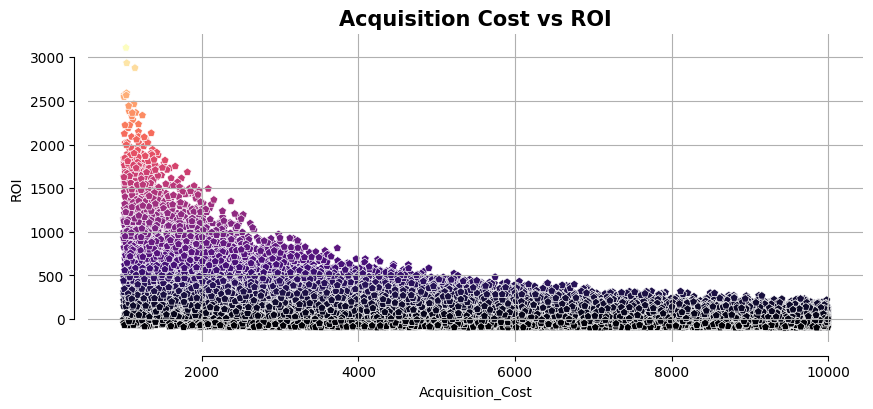

In [ ]:
#Plot a scatter plot to visualize the relationship between Acquisition_Cost and ROI.
plt.figure(figsize=(10,4))
sns.scatterplot(data=marketing_campaign, x=marketing_campaign['Acquisition_Cost'], y=marketing_campaign['ROI'], c=marketing_campaign['ROI'], cmap='magma', marker='p')
plt.title("Acquisition Cost vs ROI", fontsize=15, fontweight='bold')
plt.grid(True)
sns.despine(offset=10, trim=True)
plt.show()

###Observation:
- In thi visual we can see the Relationship between Acquisition Cost and ROI:
Acquisition cost increases,ROI generally decreases
- High ROI values above 1000 are mostly oberved when acquisition cost are below 3000

In [ ]:
#Create a bar chart to visualize the average Conversion_Rate for different Channel_Used, categorized by Campaign_Type.
average_Conversion_Rate = marketing_campaign.groupby(['Channel_Used','Campaign_Type'])['Conversion_Rate'].mean().reset_index()

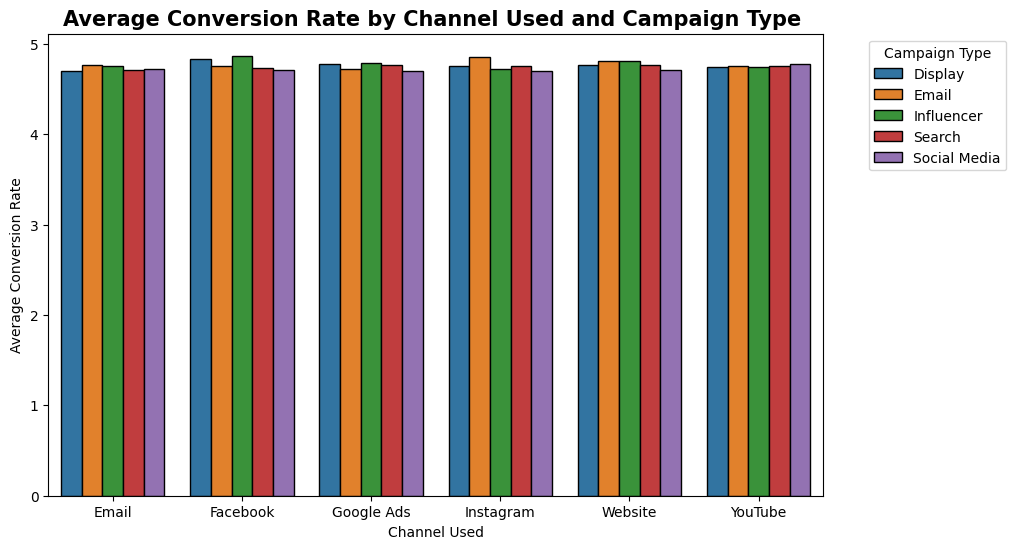

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(average_Conversion_Rate, x='Channel_Used', y='Conversion_Rate', hue='Campaign_Type', edgecolor='black')
plt.title('Average Conversion Rate by Channel Used and Campaign Type ', fontsize=15, fontweight='bold')
plt.xlabel('Channel Used')
plt.ylabel('Average Conversion Rate')
plt.legend(title='Campaign Type', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

###Observation:
- All channel show a very similar average converion rate,approximately around 4.8 to 5
- This indicates that channel selection may have minimal impact on convertion rate difference when campaign types are optimized
- Among all campaign type,infliencer and email campaigns show slightly higher converion rates across most channels

In [ ]:
marketing_campaign.columns

Index(['Campaign_ID', 'Company', 'Campaign_Type', 'Target_Audience',
       'Duration', 'Channel_Used', 'Conversion_Rate', 'Acquisition_Cost',
       'ROI', 'Location', 'Language', 'Clicks', 'Impressions',
       'Engagement_Score', 'Customer_Segment', 'Date'],
      dtype='object')

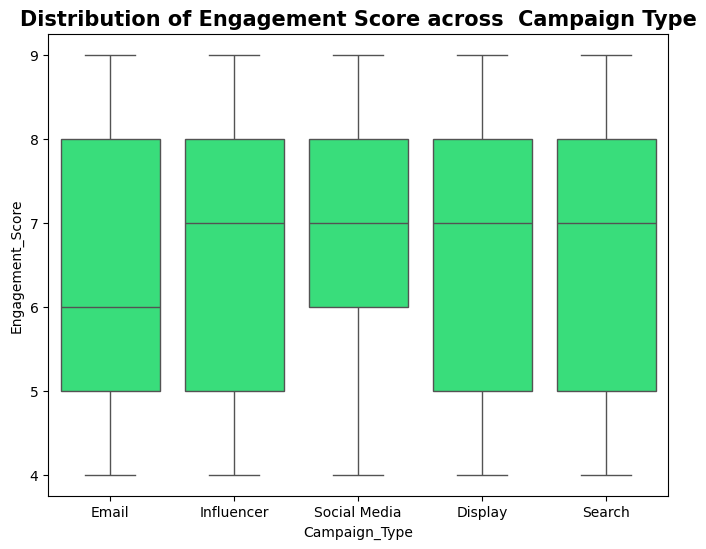

In [ ]:
#Visualize the distribution of Engagement_Score across different Campaign_Type using a box plot.
plt.figure(figsize=(8,6))
sns.boxplot(x='Campaign_Type', y='Engagement_Score', data=marketing_campaign, color="#1ef876")
plt.title('Distribution of Engagement Score across  Campaign Type', fontsize=15, fontweight='bold')
plt.show()

###Observation:
- The median engagement score for influenceer,social media,display and search are campaign type is around 7.0
- Email campaign type is 6.0
- Email campaigns how a slightly lower quartile so they are more stable and consistently engaging

In [ ]:
#Analyze the average ROI by Company using a bar chart to compare the profitability of campaigns conducted by different companies
average_ROI =  marketing_campaign.groupby('Company')['ROI'].mean().reset_index()

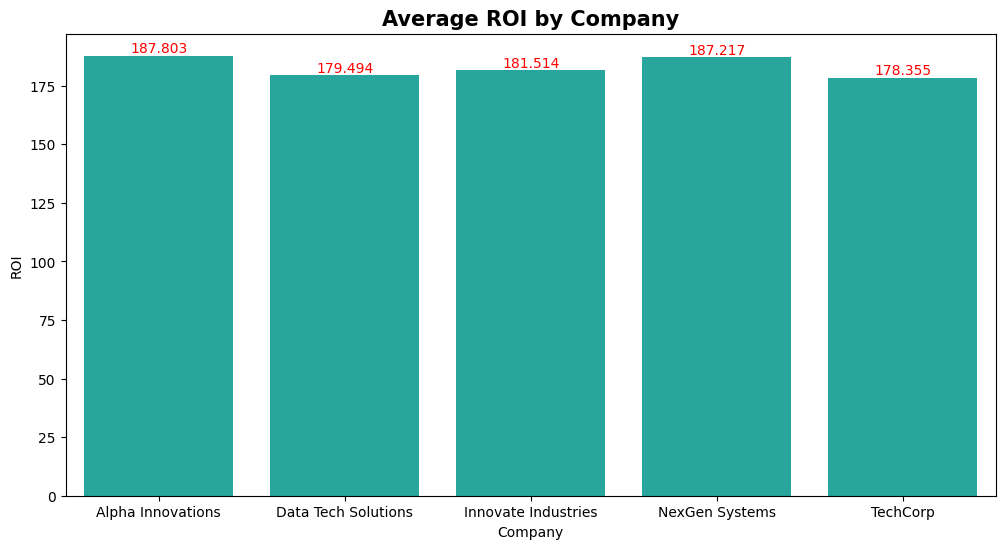

In [ ]:
plt.figure(figsize=(12,6))
avg=sns.barplot(x='Company', y='ROI', data=average_ROI, color="#13bbaf")
avg.bar_label(avg.containers[0],color="red")
plt.title('Average ROI by Company', fontsize=15, fontweight='bold')
plt.show()

###Observation:
- Alpha Innovation achieved the highest average ROI of 187.803, indicating the most efficient performance in term of return on investment.
- Dta Tech solutions recorded the lowest average ROI of 179.494, suggesting comparatively lower effectiveness in converting investment into returns

In [ ]:
# Examine the correlation between Engagement_Score and Conversion_Rate using a heatmap.
new_marketing_campaign = marketing_campaign[['Engagement_Score', 'Conversion_Rate']]
correlation = new_marketing_campaig n.corr()

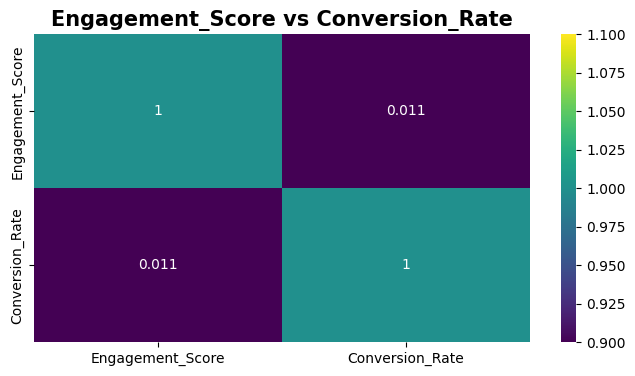

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(correlation, annot=True, vmin=1, vmax=1, cmap='viridis')
plt.title("Engagement_Score vs Conversion_Rate", fontsize=15, fontweight='bold')
plt.show()

###Observation:
- He correlation value between Engagement Score and Conversion Rate is 0.011, which is very close to zero.

- This indicates almost no linear relationship between engagement and conversion in this dataset.

##Customer Segmentation:


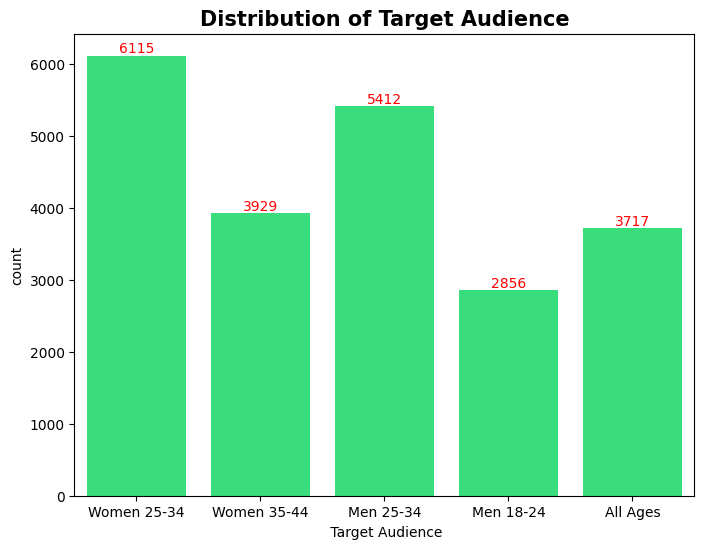

In [ ]:
# Create a count plot to visualize the distribution of Target_Audience.
plt.figure(figsize=(8,6))
count=sns.countplot(x='Target_Audience', data=marketing_campaign, color="#1ef876" )
count.bar_label(count.containers[0],color="red")
plt.title("Distribution of Target Audience", fontsize=15, fontweight='bold')
plt.xlabel(' Target Audience')
plt.ylabel('count')
plt.show()

###Observation:
- The highest count is for Women aged 25–34, with 6115 individuals targeted.

- This suggests that marketing efforts are highly focused on younger women, possibly due to higher engagement or conversion potential.

- Men aged 25–34 form the second largest group with 5412 individuals.

- Both men and women in the 25–34 age group seem to be a key demographic for campaigns.

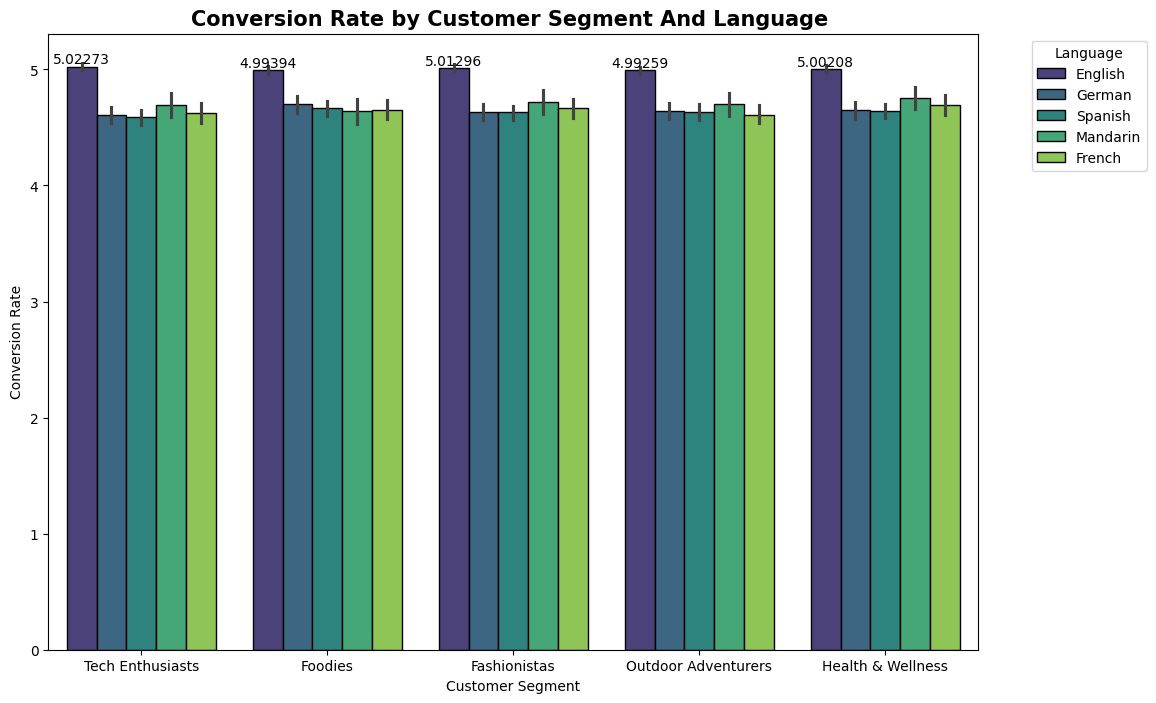

In [ ]:
# Identify which Customer_Segment has the highest Conversion_Rate for each Language using a bar chart
plt.figure(figsize=(12,8))
highest_Conversion_Rate = sns.barplot(data=marketing_campaign, x='Customer_Segment', y='Conversion_Rate', hue='Language', palette='viridis', edgecolor='black')
plt.title("Conversion Rate by Customer Segment And Language ", fontsize=15, fontweight='bold')
highest_Conversion_Rate.bar_label(highest_Conversion_Rate.containers[0])
plt.legend(title='Language', bbox_to_anchor=(1.05,1), loc='upper left')
plt.xlabel('Customer Segment')
plt.ylabel('Conversion Rate')
plt.show()

###Observation:
- In every customer segment (Tech Enthusiasts, Foodies, Fashionistas, Outdoor Adventurers, Health & Wellness), English-speaking customers have the highest conversion rate, around 5.0 or slightly above.

- This indicates that marketing strategies in English are most effective.
- All customer segments show very similar conversion rates ranging from approximately 4.9 to 5.0, regardless of language.

- This suggests that customer behavior is stable, and segment type does not strongly affect conversion.

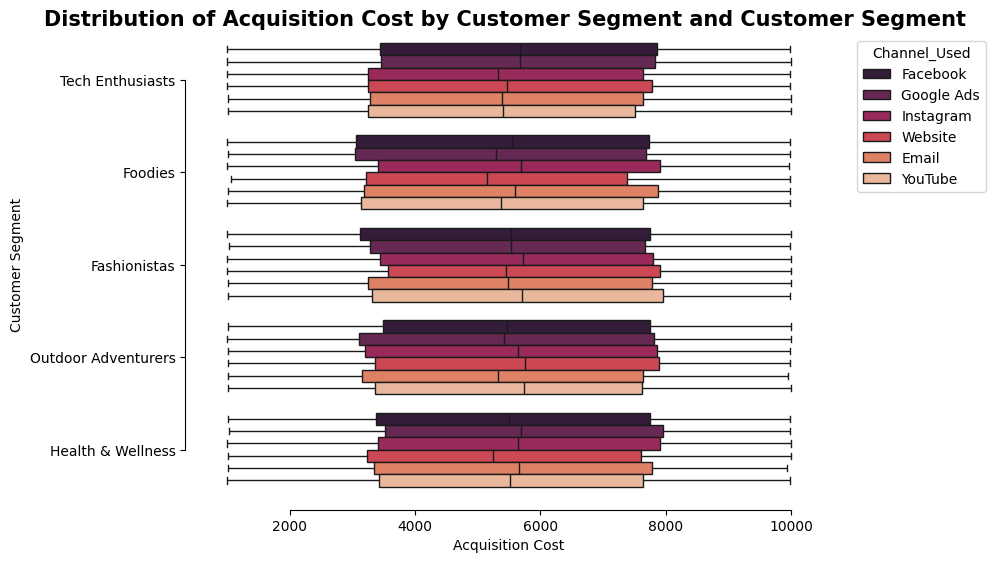

In [ ]:
#Visualize the distribution of Acquisition_Cost across each Customer_Segment,categorized by Channel_Used, using a box plot.
plt.figure(figsize=(8,6))
sns.boxplot(x='Acquisition_Cost', y='Customer_Segment', hue='Channel_Used', data=marketing_campaign, palette="rocket")
plt.title("Distribution of Acquisition Cost by Customer Segment and Customer Segment ", fontsize=15, fontweight='bold')
plt.legend(title='Channel_Used', bbox_to_anchor=(1.05,1), loc='upper left')
plt.xlabel('Acquisition Cost')
plt.ylabel('Customer Segment')
sns.despine(offset=10, trim=True)
plt.show()

###Observation:
- For all customer segments, Google Ads  and Facebook  consistently show the highest acquisition costs.

- These platforms may be more expensive, possibly due to high competition or broader reach.

- Email  and YouTube channels generally have lower acquisition costs across all segments.

- This suggests that these channels could be more cost-effective for targeting specific audiences


In [ ]:
#Analyze average Conversion_Rate by Language using a bar chart to compare the effectiveness of campaigns conducted in different languages.
average_Conversion_Rate = marketing_campaign.groupby('Language')['Conversion_Rate'].mean().reset_index()

<Figure size 1200x600 with 0 Axes>

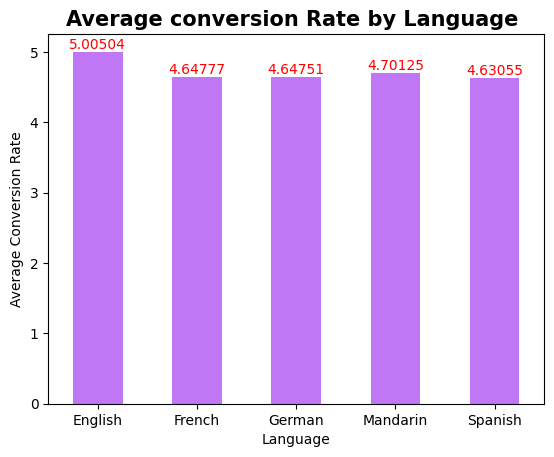

In [ ]:
plt.figure(figsize=(12,6))
bar1=average_Conversion_Rate.plot(x='Language', y='Conversion_Rate', kind='bar',legend=False, color='#bf77f6')
plt.title("Average conversion Rate by Language ", fontsize=15, fontweight='bold')
plt.xlabel('Language')
plt.ylabel('Average Conversion Rate')
plt.xticks(rotation=0)
bar1.bar_label(bar1.containers[0], color='red')
plt.show()

###Observation:
- English has a higher average conversion rate (5.00504) compared to French (4.64777).

- This suggests that English-language campaigns are more effective in driving user actions.
- The difference of about 0.36 points between English and French indicates that French campaigns may need better localization or cultural adaptation to improve effectiveness.

#Channel Effectiveness:

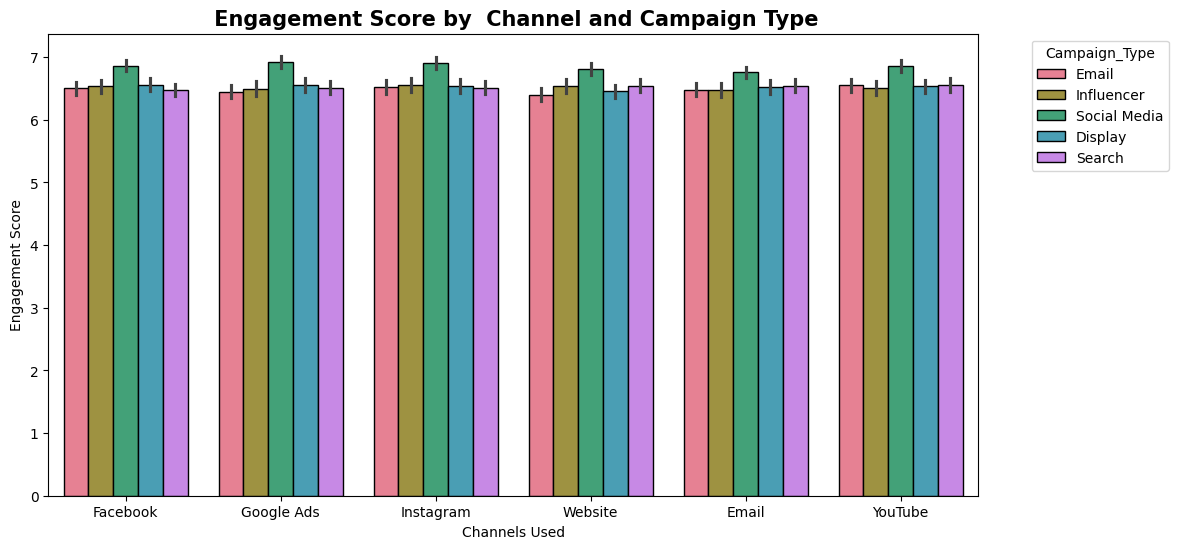

In [ ]:
# Compare the Engagement_Score for different Channels_Used, segmented by Campaign_Type, using a bar chart
plt.figure(figsize=(12,6))
sns.barplot(data = marketing_campaign, x='Channel_Used', y='Engagement_Score', hue='Campaign_Type', palette="husl", edgecolor='black')
plt.title(" Engagement Score by  Channel and Campaign Type", fontsize=15, fontweight='bold')
plt.legend(title='Campaign_Type', bbox_to_anchor=(1.05,1), loc='upper left')
plt.xlabel('Channels Used')
plt.ylabel('Engagement Score')
plt.show()

###Observation:
- in he visual social media has highly Engagement Score with
 other campaign type
- next Engagement Score is Google Ads  and Facebook  and intagram was used

In [ ]:
#Show the distribution of total ROI across different Channels_Used using a pie chart.
Total_ROI =marketing_campaign.groupby('Channel_Used')['ROI'].sum().reset_index()

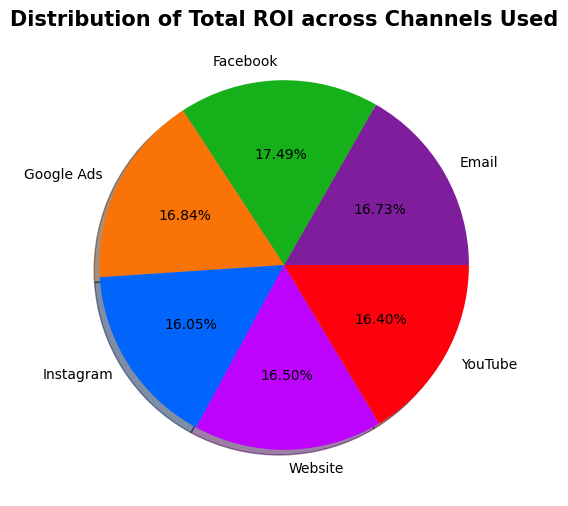

In [ ]:
plt.figure(figsize=(8,6))
plt.pie(x=Total_ROI['ROI'], labels=Total_ROI['Channel_Used'], autopct='%1.2f%%', shadow=True, colors=['#7e1e9c','#15b01a','#f97306','#0165fc','#be03fd','#ff000d'] )
plt.title("Distribution of Total ROI across Channels Used", fontsize=15, fontweight='bold')
plt.show()

###Observation:
- The Return on Investment (ROI) is relatively evenly distributed across all listed channels (Facebook, Email, YouTube, Website, Instagram, Google Ads).
- The percentages range from 16.05% (Instagram) to 17.49% (Facebook), indicating that no single channel overwhelmingly dominates the total ROI.

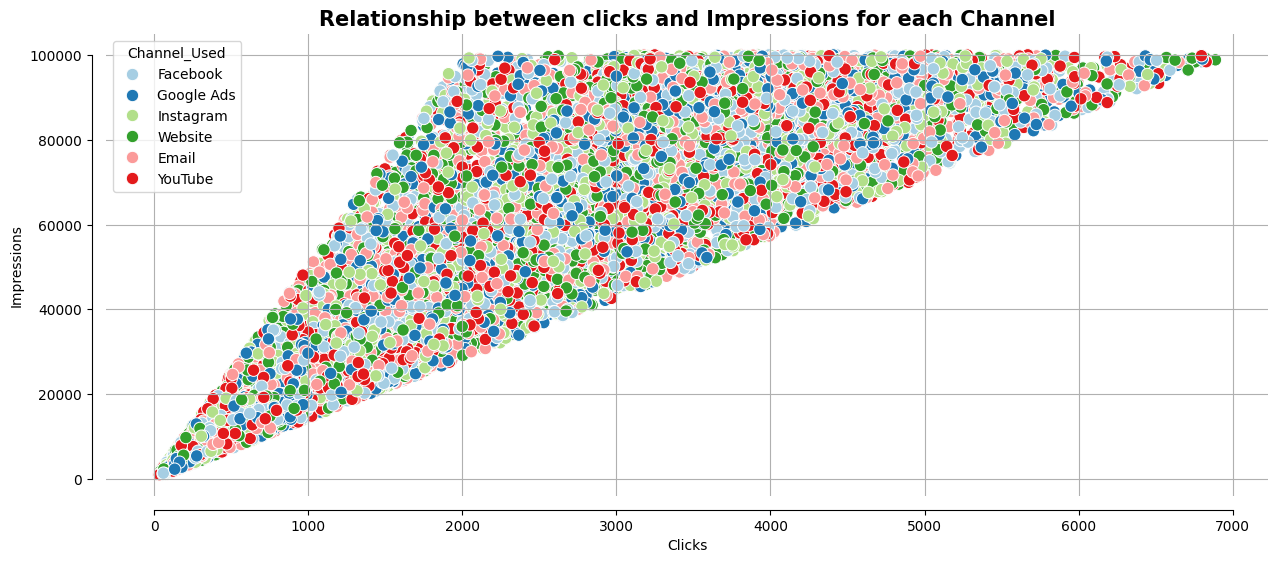

In [ ]:
#Plot a scatter plot to show the relationship between Clicks and Impressions for each Channel_Used.
plt.figure(figsize=(15,6))
sns.scatterplot(data=marketing_campaign, x='Clicks', y='Impressions',hue='Channel_Used',palette="Paired", s=80)
plt.title("Relationship between clicks and Impressions for each Channel", fontsize=15, fontweight='bold')
sns.despine(offset=10, trim=True)
plt.grid(True)
plt.show()

###Observation:
- The scatter plot clearly shows a positive correlation between "Clicks" on the x-axis and "Impressions" on the y-axis.
- As the number of clicks increases, the number of impressions also generally increases. The data points form a rough triangular shape, expanding outwards from the origin.

#Time-Based Analysis:

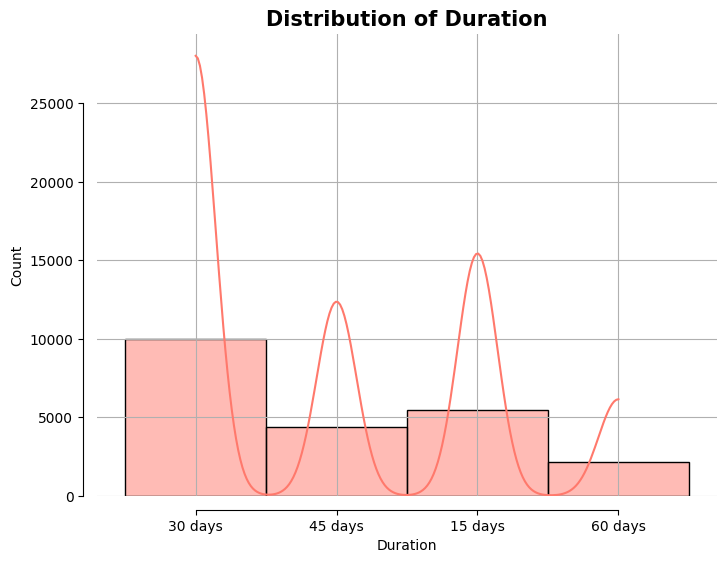

In [ ]:
# Plot the distribution of Duration using a histogram
plt.figure(figsize=(8,6))
sns.histplot(marketing_campaign['Duration'], kde=True, bins=10, edgecolor='black', color='#ff796c')
plt.title("Distribution of Duration", fontsize=15, fontweight='bold')
sns.despine(offset=10, trim=True)
plt.grid(True)
plt.show()

###Observation:
- He most frequent campaign duration is 30 days  with a count of approximately 10,000 campaigns.
- This is significantly higher than any other duration category shown.

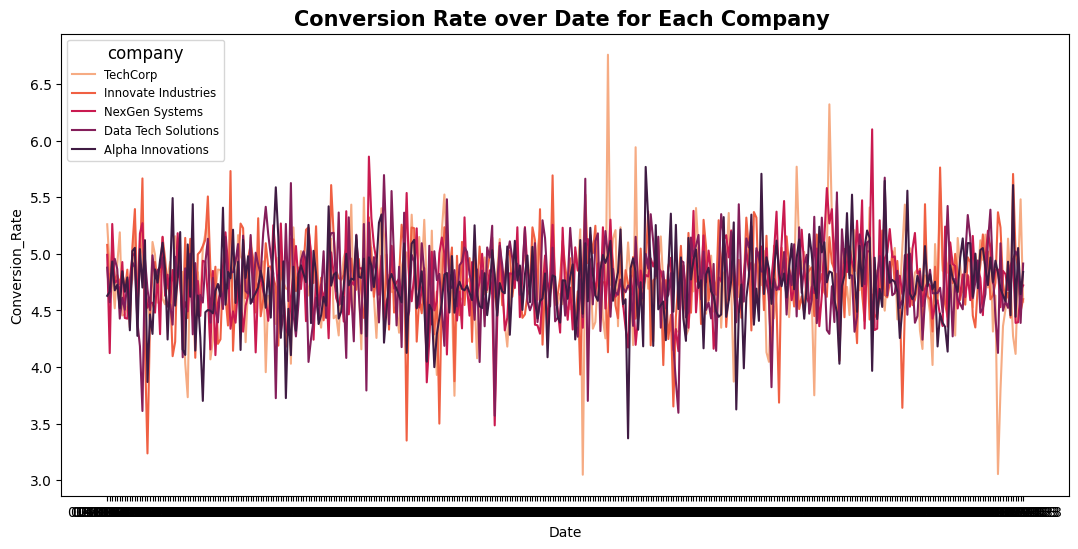

In [ ]:
#Analyze how the overall Conversion_Rate has changed over Date for each Company using a line chart.
plt.figure(figsize=(13,6))
sns.lineplot(data=marketing_campaign, x='Date', y='Conversion_Rate', hue='Company', palette="rocket_r", errorbar=None,)
plt.legend(title='company', fontsize='small', title_fontsize='large', loc='upper left')
plt.title("Conversion Rate over Date for Each Company ", fontsize=15, fontweight='bold')
plt.show()

###Observation:
- All listed companies ("TechCorp," "Innovate Industries," "NextGen Systems," "Data Tech Solutions," and "Alpha Innovations") exhibit highly volatile conversion rates over time.
-  The lines for each company show frequent and significant ups and downs, indicating daily or near-daily fluctuations rather than stable trends.


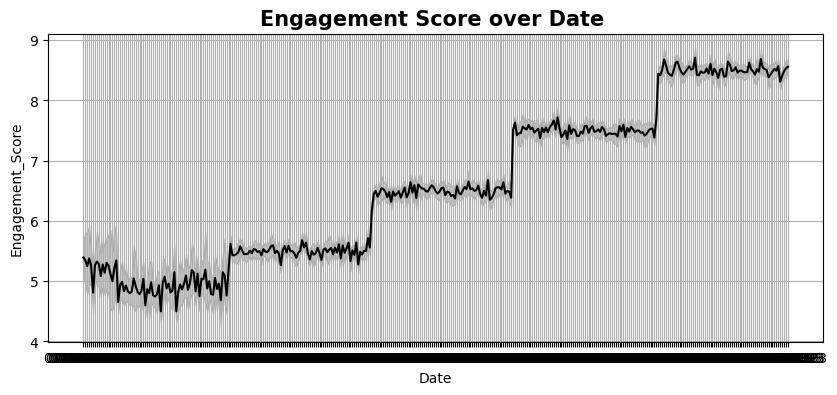

In [ ]:
# Examine the trend of Engagement_Score over Date with a line chart.
plt.figure(figsize=(10,4))
sns.lineplot(data=marketing_campaign, x='Date', y='Engagement_Score', color='black')
plt.title("Engagement Score over Date ", fontsize=15, fontweight='bold')
plt.grid(True)
plt.show()

###Observation:
- The "Engagement Score" generally shows an upward trend over time, starting around a score of 5 and increasing to nearly 9 by the end of the plotted period.

#Geographic Analysis:

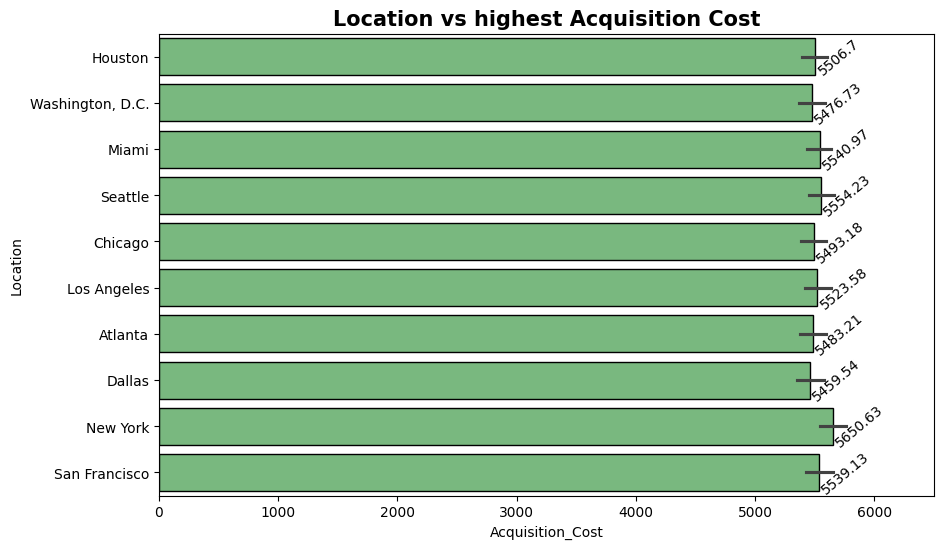

In [ ]:
# Determine which location has the highest Acquisition_Cost using a bar chart
plt.figure(figsize=(10,6))
location_bar=sns.barplot(data=marketing_campaign, x='Acquisition_Cost', y='Location', color='#6fc276', edgecolor='black')
location_bar.bar_label(location_bar.containers[0],rotation=(40))
plt.title("Location vs highest Acquisition Cost", fontsize=15, fontweight='bold')
plt.xlim(0,6500)
plt.show()

###Observation:
- Among the locations displayed, Houston exhibits the highest acquisition cost, with a value of $5506.7.

- San Francisco shows the lowest acquisition cost, recorded at $5390.13

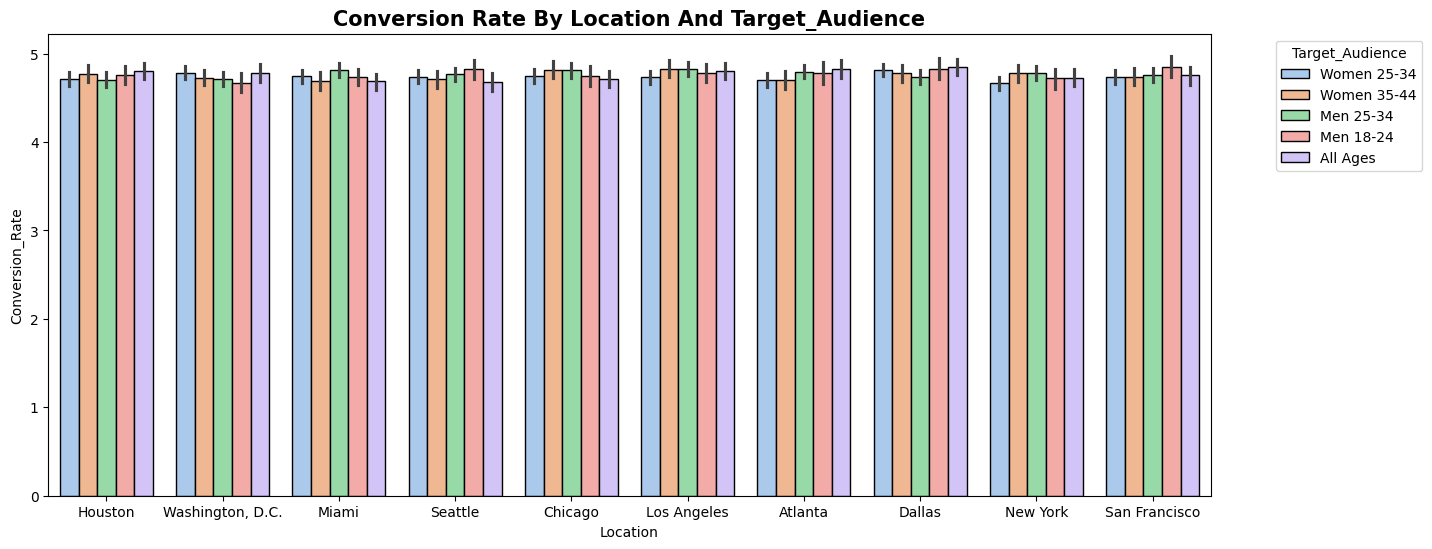

In [ ]:
# Visualize the Conversion_Rate by different Location, categorized by Target_Audience, using a bar chart.
plt.figure(figsize=(15,6))
sns.barplot(data=marketing_campaign, x='Location', y='Conversion_Rate', hue='Target_Audience', palette="pastel", edgecolor='black')
plt.legend(title='Target_Audience', bbox_to_anchor=(1.05,1), loc='upper left')
plt.title("Conversion Rate By Location And Target_Audience", fontsize=15, fontweight='bold')
plt.show()

###Observation:
- Within each location, the conversion rates for different target audiences (Women 25-34, Men 25-34, Women 18-24, Men 18-24, and All Ages) are very similar.
- The bars for each audience group within a city are almost the same height, suggesting that the target audience demographic does not heavily influence the conversion rate in this dataset.

- The conversion rates for almost all combinations of location and target audience hover around 4.5% to 4.75%.

- This indicates a generally high and stable conversion rate across the various segments analyzed.

In [ ]:
#Illustrate the proportion of ROI by Location using a pie chart.
proportion = marketing_campaign.groupby('Location')['ROI'].sum().reset_index()

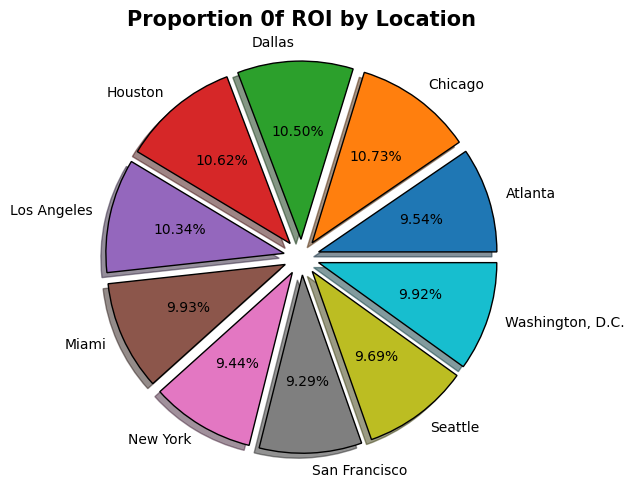

In [ ]:
plt.figure(figsize=(8,5))
plt.pie(x=proportion['ROI'], labels=proportion['Location'], autopct='%.2f%%', shadow=True, wedgeprops={'edgecolor':'black'},
        explode=(.1,.1,.1,.1,.1,.1,.1,.1,.1,.1) )
plt.title("Proportion 0f ROI by Location", fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

###Observation:
- Chicago and Dallas show the highest individual proportions of ROI.
- Chicago has the largest slice at 10.73%, closely followed by Dallas at 10.50%. This suggests these two locations contribute slightly more to the overall ROI compared to others.
- The ROI proportions across all locations are relatively similar.
- While there are slight variations, all locations fall within a narrow range, from Seattle's 9.69% to Chicago's 10.73%. This indicates a fairly even distribution of ROI across the listed cities.